In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import plotly.graph_objects as go
import plotly.express as px

def read_log(file):
    with open(file, 'r') as f:
        d = [json.loads(line) for line in f.readlines()]
    return d

## ENERGY ANALYSIS

In [2]:
n1 = pd.DataFrame(read_log('n1.txt'))
n5 = pd.DataFrame(read_log('n5.txt'))
n6 = pd.DataFrame(read_log('n6.txt'))
# n1 = pd.DataFrame(read_log('n1.txt'))

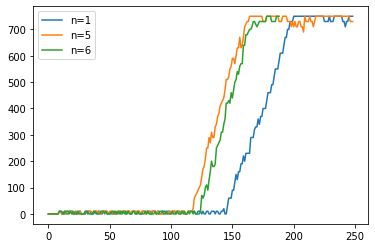

In [5]:
plt.plot(n1[n1['TICK']<250]['energy'], label='n=1')
plt.plot(n5[n5['TICK']<250]['energy'], label='n=5')
plt.plot(n6[n6['TICK']<250]['energy'], label='n=6')
plt.legend()
plt.show()

In [6]:
DIST = {(2, 4): 0, (1, 4): 1, (2, 3): 1, (2, 5): 1, (3, 4): 1, (0, 4): 2, (1, 3): 2, (1, 5): 2, (2, 2): 2, (2, 6): 2, (3, 3): 2, (3, 5): 2, (0, 3): 3, (0, 5): 3, (1, 2): 3, (1, 6): 3, (2, 1): 3, (3, 2): 3, (3, 6): 3, (4, 3): 3, (0, 2): 4, (0, 6): 4, (1, 1): 4, (2, 0): 4, (3, 1): 4, (4, 2): 4, (4, 6): 4, (3, 0): 5, (4, 1): 5, (5, 2): 5, (5, 6): 5, (4, 0): 6, (5, 1): 6, (5, 5): 6, (6, 2): 6, (6, 6): 6, (5, 0): 7, (5, 4): 7, (6, 1): 7, (6, 5): 7, (7, 6): 7, (6, 0): 8, (6, 4): 8, (7, 5): 8, (8, 6): 8, (7, 4): 9, (8, 5): 9, (8, 7): 9, (9, 6): 9, (7, 3): 10, (8, 4): 10, (8, 8): 10, (9, 5): 10, (9, 7): 10, (10, 6): 10, (7, 8): 11, (8, 3): 11, (8, 9): 11, (9, 4): 11, (9, 8): 11, (10, 5): 11, (10, 7): 11, (11, 6): 11, (6, 8): 12, (7, 9): 12, (8, 2): 12, (8, 10): 12, (9, 3): 12, (9, 9): 12, (10, 4): 12, (10, 8): 12, (11, 5): 12, (11, 7): 12, (12, 6): 12, (5, 8): 13, (6, 9): 13, (8, 1): 13, (8, 11): 13, (9, 2): 13, (9, 10): 13, (10, 3): 13, (10, 9): 13, (11, 8): 13, (12, 7): 13, (4, 8): 14, (5, 9): 14, (7, 11): 14, (8, 0): 14, (8, 12): 14, (9, 1): 14, (9, 11): 14, (10, 2): 14, (10, 10): 14, (11, 3): 14, (11, 9): 14, (12, 8): 14, (13, 7): 14, (3, 8): 15, (4, 9): 15, (6, 11): 15, (7, 12): 15, (8, 13): 15, (9, 0): 15, (9, 12): 15, (10, 1): 15, (10, 11): 15, (11, 2): 15, (11, 10): 15, (12, 9): 15, (13, 8): 15, (2, 8): 16, (3, 9): 16, (5, 11): 16, (6, 12): 16, (7, 13): 16, (8, 14): 16, (9, 13): 16, (10, 0): 16, (10, 12): 16, (11, 1): 16, (11, 11): 16, (12, 2): 16, (12, 10): 16, (13, 9): 16, (14, 8): 16, (1, 8): 17, (2, 9): 17, (4, 11): 17, (5, 12): 17, (6, 13): 17, (7, 14): 17, (8, 15): 17, (9, 14): 17, (10, 13): 17, (11, 0): 17, (11, 12): 17, (12, 1): 17, (12, 11): 17, (13, 10): 17, (14, 9): 17, (15, 8): 17, (0, 8): 18, (1, 9): 18, (3, 11): 18, (5, 13): 18, (8, 16): 18, (9, 15): 18, (10, 14): 18, (12, 0): 18, (13, 1): 18, (15, 9): 18, (16, 8): 18, (0, 9): 19, (2, 11): 19, (3, 12): 19, (8, 17): 19, (9, 16): 19, (10, 15): 19, (11, 14): 19, (13, 0): 19, (16, 9): 19, (17, 8): 19, (1, 11): 20, (2, 12): 20, (3, 13): 20, (9, 17): 20, (10, 16): 20, (11, 15): 20, (14, 0): 20, (17, 9): 20, (18, 8): 20, (0, 11): 21, (1, 12): 21, (2, 13): 21, (3, 14): 21, (10, 17): 21, (11, 16): 21, (12, 15): 21, (15, 0): 21, (18, 7): 21, (18, 9): 21, (19, 8): 21, (0, 12): 22, (1, 13): 22, (2, 14): 22, (3, 15): 22, (4, 14): 22, (11, 17): 22, (12, 16): 22, (15, 1): 22, (16, 0): 22, (18, 10): 22, (19, 7): 22, (19, 9): 22, (20, 8): 22, (0, 13): 23, (1, 14): 23, (2, 15): 23, (3, 16): 23, (4, 15): 23, (12, 17): 23, (13, 16): 23, (15, 2): 23, (16, 1): 23, (17, 0): 23, (19, 6): 23, (19, 10): 23, (20, 7): 23, (20, 9): 23, (21, 8): 23, (0, 14): 24, (1, 15): 24, (2, 16): 24, (3, 17): 24, (4, 16): 24, (5, 15): 24, (13, 17): 24, (14, 2): 24, (15, 3): 24, (16, 2): 24, (18, 0): 24, (19, 11): 24, (20, 6): 24, (20, 10): 24, (21, 7): 24, (21, 9): 24, (22, 8): 24, (0, 15): 25, (1, 16): 25, (2, 17): 25, (4, 17): 25, (5, 16): 25, (6, 15): 25, (14, 3): 25, (14, 17): 25, (16, 3): 25, (17, 2): 25, (18, 1): 25, (19, 0): 25, (20, 5): 25, (20, 11): 25, (21, 6): 25, (21, 10): 25, (22, 7): 25, (22, 9): 25, (23, 8): 25, (5, 17): 26, (6, 16): 26, (13, 3): 26, (15, 17): 26, (17, 3): 26, (19, 1): 26, (20, 0): 26, (20, 12): 26, (21, 5): 26, (21, 11): 26, (22, 6): 26, (22, 10): 26, (23, 7): 26, (23, 9): 26, (24, 8): 26, (6, 17): 27, (15, 16): 27, (16, 17): 27, (18, 3): 27, (19, 2): 27, (20, 1): 27, (21, 0): 27, (21, 4): 27, (21, 12): 27, (22, 5): 27, (22, 11): 27, (23, 6): 27, (23, 10): 27, (24, 9): 27, (25, 8): 27, (15, 15): 28, (16, 16): 28, (17, 17): 28, (20, 2): 28, (21, 1): 28, (21, 3): 28, (21, 13): 28, (22, 0): 28, (22, 4): 28, (22, 12): 28, (23, 5): 28, (23, 11): 28, (24, 6): 28, (25, 9): 28, (26, 8): 28, (14, 15): 29, (15, 14): 29, (16, 15): 29, (18, 17): 29, (20, 3): 29, (21, 2): 29, (21, 14): 29, (22, 1): 29, (22, 3): 29, (22, 13): 29, (23, 0): 29, (23, 4): 29, (23, 12): 29, (24, 5): 29, (24, 11): 29, (25, 6): 29, (26, 9): 29, (27, 8): 29, (14, 14): 30, (16, 14): 30, (17, 15): 30, (18, 16): 30, (19, 17): 30, (20, 14): 30, (21, 15): 30, (22, 2): 30, (22, 14): 30, (23, 1): 30, (23, 3): 30, (23, 13): 30, (24, 4): 30, (24, 12): 30, (25, 5): 30, (25, 11): 30, (26, 6): 30, (27, 9): 30, (28, 8): 30, (13, 14): 31, (17, 14): 31, (19, 16): 31, (20, 15): 31, (20, 17): 31, (21, 16): 31, (22, 15): 31, (23, 2): 31, (23, 14): 31, (24, 3): 31, (24, 13): 31, (25, 4): 31, (25, 12): 31, (26, 5): 31, (26, 11): 31, (27, 6): 31, (28, 9): 31, (29, 8): 31, (18, 14): 32, (19, 15): 32, (20, 16): 32, (21, 17): 32, (22, 16): 32, (23, 15): 32, (24, 14): 32, (25, 13): 32, (26, 4): 32, (26, 12): 32, (27, 11): 32, (28, 6): 32, (29, 9): 32, (30, 8): 32, (22, 17): 33, (23, 16): 33, (26, 13): 33, (28, 5): 33, (28, 11): 33, (29, 6): 33, (30, 9): 33, (31, 8): 33, (23, 17): 34, (28, 4): 34, (28, 12): 34, (29, 5): 34, (29, 11): 34, (30, 6): 34, (31, 9): 34, (28, 3): 35, (28, 13): 35, (29, 4): 35, (29, 12): 35, (30, 5): 35, (30, 11): 35, (31, 6): 35, (27, 3): 36, (28, 2): 36, (28, 14): 36, (29, 3): 36, (29, 13): 36, (30, 4): 36, (30, 12): 36, (31, 5): 36, (31, 11): 36, (27, 2): 37, (27, 14): 37, (28, 1): 37, (28, 15): 37, (29, 2): 37, (29, 14): 37, (30, 3): 37, (30, 13): 37, (31, 4): 37, (31, 12): 37, (26, 2): 38, (27, 1): 38, (27, 15): 38, (28, 0): 38, (28, 16): 38, (29, 1): 38, (29, 15): 38, (30, 2): 38, (30, 14): 38, (31, 3): 38, (31, 13): 38, (25, 2): 39, (26, 1): 39, (26, 15): 39, (27, 0): 39, (27, 16): 39, (28, 17): 39, (29, 0): 39, (29, 16): 39, (30, 1): 39, (30, 15): 39, (31, 2): 39, (31, 14): 39, (25, 1): 40, (25, 15): 40, (26, 0): 40, (26, 16): 40, (27, 17): 40, (29, 17): 40, (30, 16): 40, (31, 15): 40, (25, 0): 41, (25, 16): 41, (26, 17): 41, (25, 17): 42}

In [12]:
DIST2 = {(2, 4): 0, (1, 4): 1, (2, 3): 1, (2, 5): 1, (3, 4): 1, (0, 4): 2, (1, 3): 2, (1, 5): 2, (2, 2): 2, (2, 6): 2, (3, 3): 2, (3, 5): 2, (0, 3): 3, (0, 5): 3, (1, 2): 3, (1, 6): 3, (2, 1): 3, (3, 2): 3, (3, 6): 3, (4, 3): 3, (0, 2): 4, (0, 6): 4, (1, 1): 4, (2, 0): 4, (3, 1): 4, (4, 2): 4, (4, 6): 4, (3, 0): 5, (4, 1): 5, (5, 2): 5, (5, 6): 5, (4, 0): 6, (5, 1): 6, (5, 5): 6, (6, 2): 6, (6, 6): 6, (5, 0): 7, (5, 4): 7, (6, 1): 7, (6, 5): 7, (7, 6): 7, (6, 0): 8, (6, 4): 8, (7, 5): 8, (8, 6): 8, (7, 4): 9, (8, 5): 9, (8, 7): 9, (9, 6): 9, (7, 3): 10, (8, 4): 10, (8, 8): 10, (9, 5): 10, (9, 7): 10, (10, 6): 10, (7, 8): 11, (8, 3): 11, (8, 9): 11, (9, 4): 11, (9, 8): 11, (10, 5): 11, (10, 7): 11, (11, 6): 11, (6, 8): 12, (7, 9): 12, (8, 2): 12, (8, 10): 12, (9, 3): 12, (9, 9): 12, (10, 4): 12, (10, 8): 12, (11, 5): 12, (11, 7): 12, (12, 6): 12, (5, 8): 13, (6, 9): 13, (8, 1): 13, (8, 11): 13, (9, 2): 13, (9, 10): 13, (10, 3): 13, (10, 9): 13, (11, 8): 13, (12, 7): 13, (4, 8): 14, (5, 9): 14, (7, 11): 14, (8, 0): 14, (8, 12): 14, (9, 1): 14, (9, 11): 14, (10, 2): 14, (10, 10): 14, (11, 3): 14, (11, 9): 14, (12, 8): 14, (13, 7): 14, (3, 8): 15, (4, 9): 15, (6, 11): 15, (7, 12): 15, (8, 13): 15, (9, 0): 15, (9, 12): 15, (10, 1): 15, (10, 11): 15, (11, 2): 15, (11, 10): 15, (12, 9): 15, (13, 8): 15, (2, 8): 16, (3, 9): 16, (5, 11): 16, (6, 12): 16, (7, 13): 16, (8, 14): 16, (9, 13): 16, (10, 0): 16, (10, 12): 16, (11, 1): 16, (11, 11): 16, (12, 2): 16, (12, 10): 16, (13, 9): 16, (14, 8): 16, (1, 8): 17, (2, 9): 17, (4, 11): 17, (5, 12): 17, (6, 13): 17, (7, 14): 17, (8, 15): 17, (9, 14): 17, (10, 13): 17, (11, 0): 17, (11, 12): 17, (12, 1): 17, (12, 11): 17, (13, 10): 17, (14, 9): 17, (15, 8): 17, (0, 8): 18, (1, 9): 18, (3, 11): 18, (5, 13): 18, (8, 16): 18, (9, 15): 18, (10, 14): 18, (12, 0): 18, (13, 1): 18, (15, 9): 18, (16, 8): 18, (0, 9): 19, (2, 11): 19, (3, 12): 19, (8, 17): 19, (9, 16): 19, (10, 15): 19, (11, 14): 19, (13, 0): 19, (16, 9): 19, (17, 8): 19, (1, 11): 20, (2, 12): 20, (3, 13): 20, (9, 17): 20, (10, 16): 20, (11, 15): 20, (14, 0): 20, (17, 9): 20, (18, 8): 20, (0, 11): 21, (1, 12): 21, (2, 13): 21, (3, 14): 21, (10, 17): 21, (11, 16): 21, (12, 15): 21, (15, 0): 21, (18, 7): 21, (18, 9): 21, (19, 8): 21, (0, 12): 22, (1, 13): 22, (2, 14): 22, (3, 15): 22, (4, 14): 22, (11, 17): 22, (12, 16): 22, (15, 1): 22, (16, 0): 22, (18, 10): 22, (19, 7): 22, (19, 9): 22, (20, 8): 22, (0, 13): 23, (1, 14): 23, (2, 15): 23, (3, 16): 23, (4, 15): 23, (12, 17): 23, (13, 16): 23, (15, 2): 23, (16, 1): 23, (17, 0): 23, (19, 6): 23, (19, 10): 23, (20, 7): 23, (20, 9): 23, (21, 8): 23, (0, 14): 24, (1, 15): 24, (2, 16): 24, (3, 17): 24, (4, 16): 24, (5, 15): 24, (13, 17): 24, (14, 2): 24, (15, 3): 24, (16, 2): 24, (18, 0): 24, (19, 11): 24, (20, 6): 24, (20, 10): 24, (21, 7): 24, (21, 9): 24, (22, 8): 24, (0, 15): 25, (1, 16): 25, (2, 17): 25, (4, 17): 25, (5, 16): 25, (6, 15): 25, (14, 3): 25, (14, 17): 25, (16, 3): 25, (17, 2): 25, (18, 1): 25, (19, 0): 25, (20, 5): 25, (20, 11): 25, (21, 6): 25, (21, 10): 25, (22, 7): 25, (22, 9): 25, (23, 8): 25, (5, 17): 26, (6, 16): 26, (13, 3): 26, (15, 17): 26, (17, 3): 26, (19, 1): 26, (20, 0): 26, (20, 12): 26, (21, 5): 26, (21, 11): 26, (22, 6): 26, (22, 10): 26, (23, 7): 26, (23, 9): 26, (24, 8): 26, (6, 17): 27, (15, 16): 27, (16, 17): 27, (18, 3): 27, (19, 2): 27, (20, 1): 27, (21, 0): 27, (21, 4): 27, (21, 12): 27, (22, 5): 27, (22, 11): 27, (23, 6): 27, (23, 10): 27, (24, 9): 27, (25, 8): 27, (15, 15): 28, (16, 16): 28, (17, 17): 28, (20, 2): 28, (21, 1): 28, (21, 3): 28, (21, 13): 28, (22, 0): 28, (22, 4): 28, (22, 12): 28, (23, 5): 28, (23, 11): 28, (24, 6): 28, (25, 9): 28, (26, 8): 28, (14, 15): 29, (15, 14): 29, (16, 15): 29, (18, 17): 29, (20, 3): 29, (21, 2): 29, (21, 14): 29, (22, 1): 29, (22, 3): 29, (22, 13): 29, (23, 0): 29, (23, 4): 29, (23, 12): 29, (24, 5): 29, (24, 11): 29, (25, 6): 29, (26, 9): 29, (27, 8): 29, (14, 14): 30, (16, 14): 30, (17, 15): 30, (18, 16): 30, (19, 17): 30, (20, 14): 30, (21, 15): 30, (22, 2): 30, (22, 14): 30, (23, 1): 30, (23, 3): 30, (23, 13): 30, (24, 4): 30, (24, 12): 30, (25, 5): 30, (25, 11): 30, (26, 6): 30, (27, 9): 30, (28, 8): 30, (13, 14): 31, (17, 14): 31, (19, 16): 31, (20, 15): 31, (20, 17): 31, (21, 16): 31, (22, 15): 31, (23, 2): 31, (23, 14): 31, (24, 3): 31, (24, 13): 31, (25, 4): 31, (25, 12): 31, (26, 5): 31, (26, 11): 31, (27, 6): 31, (28, 9): 31, (29, 8): 31, (18, 14): 32, (19, 15): 32, (20, 16): 32, (21, 17): 32, (22, 16): 32, (23, 15): 32, (24, 14): 32, (25, 13): 32, (26, 4): 32, (26, 12): 32, (27, 11): 32, (28, 6): 32, (29, 9): 32, (30, 8): 32, (22, 17): 33, (23, 16): 33, (26, 13): 33, (28, 5): 33, (28, 11): 33, (29, 6): 33, (30, 9): 33, (31, 8): 33, (23, 17): 34, (28, 4): 34, (28, 12): 34, (29, 5): 34, (29, 11): 34, (30, 6): 34, (31, 9): 34, (28, 3): 35, (28, 13): 35, (29, 4): 35, (29, 12): 35, (30, 5): 35, (30, 11): 35, (31, 6): 35, (27, 3): 36, (28, 2): 36, (28, 14): 36, (29, 3): 36, (29, 13): 36, (30, 4): 36, (30, 12): 36, (31, 5): 36, (31, 11): 36, (27, 2): 37, (27, 14): 37, (28, 1): 37, (28, 15): 37, (29, 2): 37, (29, 14): 37, (30, 3): 37, (30, 13): 37, (31, 4): 37, (31, 12): 37, (26, 2): 38, (27, 1): 38, (27, 15): 38, (28, 0): 38, (28, 16): 38, (29, 1): 38, (29, 15): 38, (30, 2): 38, (30, 14): 38, (31, 3): 38, (31, 13): 38, (25, 2): 39, (26, 1): 39, (26, 15): 39, (27, 0): 39, (27, 16): 39, (28, 17): 39, (29, 0): 39, (29, 16): 39, (30, 1): 39, (30, 15): 39, (31, 2): 39, (31, 14): 39, (25, 1): 40, (25, 15): 40, (26, 0): 40, (26, 16): 40, (27, 17): 40, (29, 17): 40, (30, 16): 40, (31, 15): 40, (25, 0): 41, (25, 16): 41, (26, 17): 41, (25, 17): 42}

In [13]:
DIST == DIST2

True

In [15]:
len(x)

3

In [16]:
FOOD_SOURCES = {(5, 1): {'us': 6, 'others': 25}, (26, 1): {'us': 39, 'others': 6}, (15, 3): {'us': 24, 'others': 25}, (16, 3): {'us': 25, 'others': 24}, (12, 8): {'us': 14, 'others': 15}, (19, 8): {'us': 21, 'others': 14}, (12, 9): {'us': 15, 'others': 14}, (19, 9): {'us': 22, 'others': 14}, (15, 14): {'us': 29, 'others': 24}, (16, 14): {'us': 30, 'others': 24}, (5, 16): {'us': 25, 'others': 6}, (26, 16): {'us': 40, 'others': 6}}

In [24]:
import numpy as np

np.std([i['others'] for i in FOOD_SOURCES.values()])

7.443770699196895

In [22]:
np.mean([i['us'] for i in FOOD_SOURCES.values()])

24.166666666666668

In [25]:
np.std([i['us'] for i in FOOD_SOURCES.values()])

9.405967373014974

In [26]:
[i['us'] for i in FOOD_SOURCES.values()]

[6, 39, 24, 25, 14, 21, 15, 22, 29, 30, 25, 40]

In [34]:
[i['others'] for i in FOOD_SOURCES.values()]

[25, 6, 25, 24, 15, 14, 14, 14, 24, 24, 6, 6]

In [130]:
stats.zscore([6, 39, 24, 25, 14, 21, 15, 22, 29, 30, 25, 40]) * -2

array([ 3.86279602, -3.15402611,  0.0354385 , -0.17719248,  2.16174823,
        0.67333142,  1.94911726,  0.46070044, -1.02771637, -1.24034735,
       -0.17719248, -3.36665708])

In [129]:
stats.zscore([i['others'] for i in FOOD_SOURCES.values()])

array([ 1.15308943, -1.39938038,  1.15308943,  1.01874892, -0.19031573,
       -0.32465625, -0.32465625, -0.32465625,  1.01874892,  1.01874892,
       -1.39938038, -1.39938038])

In [42]:
x = stats.zscore([6, 39, 24, 25, 14, 21, 15, 22, 29, 30, 25, 40]) * -2 + stats.zscore([i['others'] for i in FOOD_SOURCES.values()])
x

array([ 5.01588545, -4.55340649,  1.18852793,  0.84155644,  1.9714325 ,
        0.34867517,  1.62446101,  0.13604419, -0.00896746, -0.22159843,
       -1.57657286, -4.76603746])

In [50]:
y = x - x.min()
y

array([9.78192291, 0.21263097, 5.95456539, 5.6075939 , 6.73746996,
       5.11471263, 6.39049847, 4.90208166, 4.75707001, 4.54443903,
       3.1894646 , 0.        ])

In [71]:
list(FOOD_SOURCES.keys())

[(5, 1),
 (26, 1),
 (15, 3),
 (16, 3),
 (12, 8),
 (19, 8),
 (12, 9),
 (19, 9),
 (15, 14),
 (16, 14),
 (5, 16),
 (26, 16)]

In [124]:
random.choice(list(FOOD_SOURCES.keys()), weights=y)

TypeError: choice() got an unexpected keyword argument 'weights'

In [125]:
(x - x.min()) 

array([9.78192291, 0.21263097, 5.95456539, 5.6075939 , 6.73746996,
       5.11471263, 6.39049847, 4.90208166, 4.75707001, 4.54443903,
       3.1894646 , 0.        ])

In [108]:
import random

numberList = [111, 222, 333, 444, 555]
print(random.choices(numberList, weights=(10, 20, 30, 40, 50), k=5))

[111, 222, 222, 444, 555]


In [127]:
(x - x.min()) / (x - x.min()).sum()

array([0.17103522, 0.00371782, 0.10411454, 0.0980478 , 0.11780349,
       0.08942986, 0.11173675, 0.08571204, 0.08317654, 0.07945872,
       0.05576723, 0.        ])

In [117]:
stats.zscore([6, 39, 24, 25, 14, 21, 15, 22, 29, 30, 25, 40])

array([-1.93139801,  1.57701305, -0.01771925,  0.08859624, -1.08087412,
       -0.33666571, -0.97455863, -0.23035022,  0.51385819,  0.62017367,
        0.08859624,  1.68332854])

In [123]:


z_scores([6, 39, 24, 25, 14, 21, 15, 22, 29, 30, 25, 40])

array([-1.93139801,  1.57701305, -0.01771925,  0.08859624, -1.08087412,
       -0.33666571, -0.97455863, -0.23035022,  0.51385819,  0.62017367,
        0.08859624,  1.68332854])

In [122]:
statistics.zscore

AttributeError: module 'statistics' has no attribute 'zscore'